In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd gdrive

Epoch 1/300
21/21 [==============================] - 0s 1ms/step - loss: 795901.8125
Epoch 2/300
21/21 [==============================] - 0s 1ms/step - loss: 795860.5625
Epoch 3/300
21/21 [==============================] - 0s 969us/step - loss: 795823.5000
Epoch 4/300
21/21 [==============================] - 0s 1ms/step - loss: 795786.6250
Epoch 5/300
21/21 [==============================] - 0s 1ms/step - loss: 795749.7500
Epoch 6/300
21/21 [==============================] - 0s 1ms/step - loss: 795713.0000
Epoch 7/300
21/21 [==============================] - 0s 959us/step - loss: 795676.3125
Epoch 8/300
21/21 [==============================] - 0s 999us/step - loss: 795639.3750
Epoch 9/300
21/21 [==============================] - 0s 1ms/step - loss: 795602.5625
Epoch 10/300
21/21 [==============================] - 0s 1ms/step - loss: 795565.7500
Epoch 11/300
21/21 [==============================] - 0s 1ms/step - loss: 795528.8750
Epoch 12/300
21/21 [==============================] - 0s 

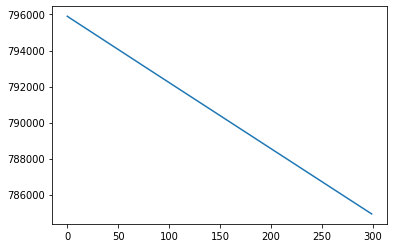

In [67]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
import seaborn as sbn

datas = pd.read_excel('/gdrive/My Drive/KerasDeepLearning/BicyclesPrices.xlsx')

x = datas.iloc[:,1:].values
y = datas.iloc[:,:1].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33,random_state=15)

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

model.fit(x_train_scaled, y_train, epochs=300)

loss = model.history.history['loss']

sbn.lineplot(x=range(len(loss)), y=loss)
 

In [65]:
print("Train loss = ",model.evaluate(x_train_scaled, y_train, verbose=0))
print("Test loss = ",model.evaluate(x_test_scaled, y_test, verbose=0))


testPredicts = model.predict(x_test_scaled)

DF_pred = pd.DataFrame(y_test, columns=['Real Price'])
testPredicts = pd.Series(testPredicts.reshape(330,))

DF_pred = pd.concat([DF_pred,testPredicts],axis=1)

DF_pred.columns= ['Price Real', 'Price Predict']

Train loss =  784910.0625
Test loss =  762488.125


In [66]:
DF_pred

,Price Real,Price Predict
0,1081.652164,6.305523
1,622.675990,6.305523
2,889.356810,6.305523
3,902.826733,6.305523
4,897.662404,6.305523
...,...,...
325,1028.438035,6.305523
326,789.934950,6.305523
327,758.490486,6.305523
328,1172.871659,6.305523


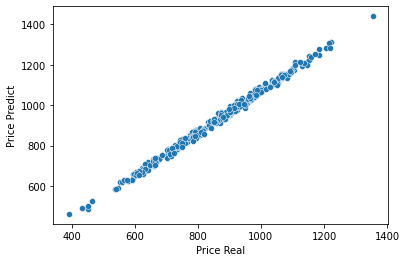

In [54]:
sbn.scatterplot( x='Price Real', y = 'Price Predict' , data = DF_pred)

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Mean Absolute Error: ",mean_absolute_error(DF_pred['Price Real'], DF_pred['Price Predict']))
print("Mean Squared Error: ",mean_squared_error(DF_pred['Price Real'], DF_pred['Price Predict']))


Mean Absolute Error:  66.52041106944719
Mean Squared Error:  4619.418410074751


In [57]:
## Save model
model.save('Bicycle_Model.h5')

BicycleModel = load_model('Bicycle_Model.h5')

In [62]:
values = [[1751,1750]]
values_scaled = scaler.transform(values)
BicycleModel.predict(values_scaled)

array([[229.97733]], dtype=float32)